<a href="https://colab.research.google.com/github/chehansivaruban/Cyber---SDGP/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [3]:
df = pd.read_csv(
  "dateindex1.csv", 
  parse_dates=['datetime'], 
  index_col="datetime"
)

In [4]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year
df.head()

,G,hour,day_of_month,day_of_week,month,year
datetime,,,,,,
2005-01-01 00:00:00,0.0,0,1,5,1,2005
2005-01-01 01:00:00,55.0,1,1,5,1,2005
2005-01-01 02:00:00,41.0,2,1,5,1,2005
2005-01-01 03:00:00,203.0,3,1,5,1,2005
2005-01-01 04:00:00,421.0,4,1,5,1,2005


In [5]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

73633 31558


In [6]:
X_train = train.drop(columns=['G'])
Y_train = train[['G']]
X_test = test.drop(columns=['G'])
Y_test = test[['G']]
print(X_train)

                     hour  day_of_month  day_of_week  month  year
datetime                                                         
2005-01-01 00:00:00     0             1            5      1  2005
2005-01-01 01:00:00     1             1            5      1  2005
2005-01-01 02:00:00     2             1            5      1  2005
2005-01-01 03:00:00     3             1            5      1  2005
2005-01-01 04:00:00     4             1            5      1  2005
...                   ...           ...          ...    ...   ...
2013-05-26 20:00:00    20            26            6      5  2013
2013-05-26 21:00:00    21            26            6      5  2013
2013-05-26 22:00:00    22            26            6      5  2013
2013-05-26 23:00:00    23            26            6      5  2013
2013-05-27 00:00:00     0            27            0      5  2013

[73633 rows x 5 columns]


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

dt = DecisionTreeRegressor(max_depth=4,
                           min_samples_leaf = 0.1,
                           random_state=3)

In [11]:
history = dt.fit(X_train,Y_train)
y_pred = dt.predict(X_test)
mse_dt = MSE(Y_test,y_pred)
rmse_dt = mse_dt**(1/2)
print(rmse_dt)

146.77921566871976


In [13]:
print(X_test)

                     hour  day_of_month  day_of_week  month  year
datetime                                                         
2013-05-27 01:00:00     1            27            0      5  2013
2013-05-27 02:00:00     2            27            0      5  2013
2013-05-27 03:00:00     3            27            0      5  2013
2013-05-27 04:00:00     4            27            0      5  2013
2013-05-27 05:00:00     5            27            0      5  2013
...                   ...           ...          ...    ...   ...
2016-12-31 18:00:00    18            31            5     12  2016
2016-12-31 19:00:00    19            31            5     12  2016
2016-12-31 20:00:00    20            31            5     12  2016
2016-12-31 21:00:00    21            31            5     12  2016
2016-12-31 22:00:00    22            31            5     12  2016

[31558 rows x 5 columns]


In [12]:
print(y_pred)

[164.57095057 164.57095057 736.51345525 ...   0.           0.
   0.        ]


In [29]:
test_data = np.array([  15,	2,	5	,1	,2009])
print(dt.predict(test_data.reshape(1,5)))

[0.]


In [ ]:
X_train = train.drop(columns=['G'])
Y_train = train[['G']]
X_test = test.drop(columns=['G'])
Y_test = test[['G']]
print(X_train)

In [31]:
y = df[['G']]
X= df.drop(columns=['G'])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
history=regressor.fit(X_train, y_train)


In [55]:
y_pred = regressor.predict(X_test)

In [36]:
y_pred

array([411.,   0.,   0., ...,   0.,   0., 129.])

In [37]:
y_test

,G
datetime,
2011-06-02 02:00:00,303.0
2012-03-07 22:00:00,0.0
2010-05-09 18:00:00,0.0
2007-09-25 21:00:00,0.0
2007-04-17 12:00:00,0.0
...,...
2006-03-05 01:00:00,128.0
2009-01-04 19:00:00,0.0
2014-05-28 14:00:00,0.0


In [38]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 57.386782166452775
Mean Squared Error: 18619.074802352774
Root Mean Squared Error: 136.4517306682212


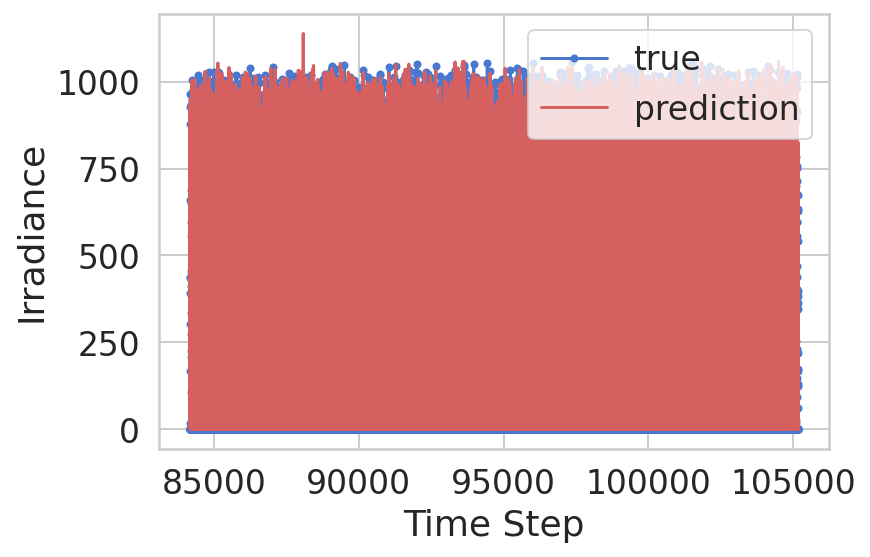

In [56]:
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Irradiance')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [59]:
import pickle
with open('decision_Tree_model','wb') as f:
  pickle.dump(regressor,f)

In [61]:
test_data = np.array([  7,	2,	5	,1	,2009])
print(regressor.predict(test_data.reshape(1,5)))

[900.01]
